In [ ]:
!pip install pgmpy

     |████████████████████████████████| 1.9 MB 16.2 MB/s 
     |████████████████████████████████| 1.9 MB 23.6 MB/s 
     |████████████████████████████████| 9.8 MB 23.0 MB/s 
     |████████████████████████████████| 233 kB 13.2 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd

df = pd.read_csv("data/processed.csv")
df.head()

,Gender,Own_car,Own_property,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Income_type,Education_type,Family_status,Target
0,1,1,1,0,0,2,1y-2y,high,30-39,Working,Higher education,Civil marriage,1
1,1,1,1,0,0,2,2y-3y,low,50-59,Working,Secondary / secondary special,Married,0
2,0,0,1,0,0,1,<1y,high,50-59,Commercial associate,Secondary / secondary special,Single / not married,0
3,0,0,1,1,0,1,1y-2y,high,60>=,Pensioner,Higher education,Separated,0
4,1,1,1,0,0,2,<1y,high,40-49,Working,Higher education,Married,0


Working for n conditional variables: 6: 100%|██████████| 6/6 [01:48<00:00, 18.13s/it]


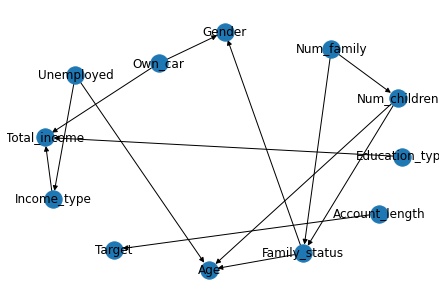

In [2]:
from pgmpy.estimators import PC, HillClimbSearch
import networkx as nx

pcest = PC(df)
pcmodel = pcest.estimate(max_cond_vars=6, significance_level=0.02)
nx.draw(pcmodel, with_labels=True)

  0%|          | 17/1000000 [00:05<87:22:49,  3.18it/s]


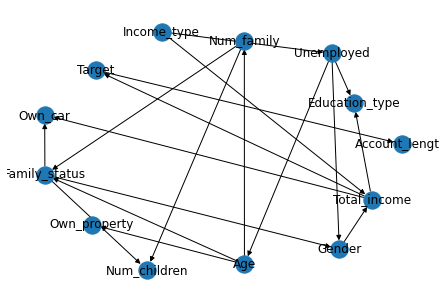

In [4]:
from pgmpy.estimators import BicScore
hillclimbest = HillClimbSearch(df)
hillclimbmodel = hillclimbest.estimate(scoring_method=BicScore(df), fixed_edges=[("Total_income", "Target"), ("Income_type", "Total_income")], black_list=[("Own_car","Gender"), ("Gender", "Own_car")])
nx.draw(hillclimbmodel, with_labels=True)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=03282642-4d6b-431b-a45f-9f21a6236fff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>